# Uniform Policy: Constant Step Size

/Users/lasyaakshara/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/lasyaakshara/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


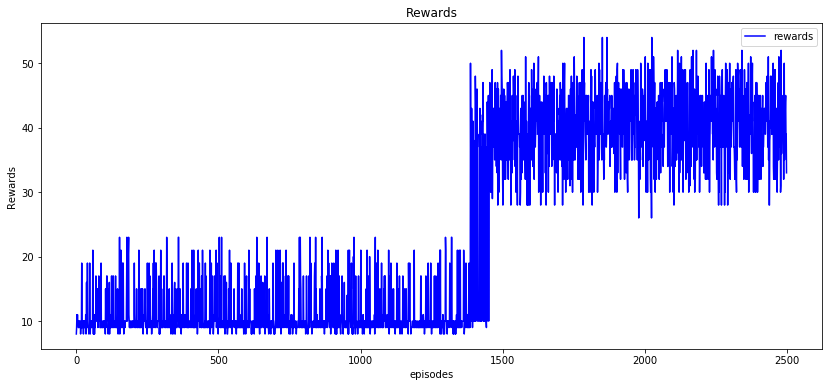

In [1]:
import gym
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
env = gym.make('CartPole-v0')
class Qlearning():
    def __init__(self,bins=(1, 1, 6, 12), max_episodes = 5000, max_steps = 200,min_alpha=0.1, min_epsilon=0.1, epsilon = 1.0, gamma = 1.0, decay = 25, solved=False, action_space = env.action_space.n):   #max_env_steps=None
        self.bins = bins #(1, 1, 6, 12)--> number of buckets for each action space
        self.max_episodes = max_episodes # number of training episodes 
        self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate
        self.beta = 0.5
        self.epsilon = epsilon # exploration rate
        self.min_alpha = min_alpha
        self.min_epsilon = min_epsilon 
        self.solved = solved
        self.gamma = gamma
        self.decay = decay  #works for most numbers between 5 and 35
        self.action_space = action_space
        self.env = gym.make('CartPole-v0')
        self.QTable = np.zeros((self.bins + (self.action_space,))) #The Q-matrix has now a dimension of (1 x 1 x 6 x 12 x 2).
        #print(self.QTable)
        
    def discretize(self, state):
        upper_bounds = [env.observation_space.high[0], 0.5, env.observation_space.high[2], math.radians(50)]  #UNDERSTAND HOW THIS WORKS
        lower_bounds = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -math.radians(50)]
        descretizedList = list()
        for i in  range(len(state)): #state = tuple (0,0,X,X)--> aka the state space  #scaling factor
            ratios = (state[i] + abs(upper_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) # (state+lower / bin_width) = bucket size
            new_obs = int(round((self.bins[i] - 1) * ratios)) #multiply the bucket size by the bucket # scaling the buckets so that the state is reduced#  - 1makes the first two buckets 0, and #bucket_lower := min_x + bucket × bucket size
            new_obs = min(self.bins[i] - 1, max(0, new_obs)) 
            descretizedList.append(new_obs)
        return tuple(descretizedList)

    def action_uniform(self, state):#_uniform
        action = self.env.action_space.sample()  #Only exploration
        return action
    
    def action_policy(self, state, policy):
        return policy[state]

    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        # self.QTable[old_state][action] += alpha * (reward + self.gamma * np.max(self.Q[state_new]) - self.Q[state_old][action])
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
    
    def decay_step_size(self, t):
        num = self.alpha
        dem = t**self.beta
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = num / dem  
        return step_size

    def learning(self):
        listof100 = deque(maxlen=100) #https://stackoverflow.com/questions/5944708/python-forcing-a-list-to-a-fixed-size
        rewards = []
        alphaList = []
        tt = 0
        for e in range(self.max_episodes):  
            state = self.discretize(self.env.reset())
            step_size = 0.01 #self.decay_step_size(e)
            i = 0
            for t in range(self.max_steps):
                tt+=1
                if e % 2 == 0:
                    action = self.action_uniform(state) 
                elif e % 2 == 1:
                    action = self.action_policy(state, policy)
                new_state, reward, done, info = self.env.step(action)
                new_state = self.discretize(new_state)
                self.Q_Update(state, action, reward, new_state, step_size)
                state = new_state
                i += 1
                if done:
                    break
            stateTuple = list()
            stateList = []
            actionsList = []
            states = []
            for list1 in self.QTable:
                for nextList in list1:
                    for nextList1 in nextList:
                        for nextList2 in nextList1:
                            actions = np.argmax(nextList2)
                            actionsList.append(actions)
            observations = np.argwhere(self.QTable>=0)
            j = 0
            for obsList in observations:
                stateTuple = (obsList[0], obsList[1], obsList[2], obsList[3])
                stateList.append(stateTuple)
            del stateList[1::2]
            policy = dict(zip(stateList, actionsList))
            listof100.append(i)
            mean_listof100 = np.mean(listof100)
            if e % 2 == 1:
                rewards.append(i)
            alphaList.append(step_size)
            mean_rewards =  np.mean(rewards)
            if mean_listof100 >= 195 and e >= 100:
                print("Solved after " + str(e) + " episodes.")
                return rewards, alphaList
            return rewards, alphaList


if __name__ == '__main__':
    ''' Run main program. '''
    #main()
    solve = Qlearning()
    rewards, alpha= solve.learning()
    fig = plt.figure(figsize=(14,6))
    """ax2 = fig.add_subplot(211)
    ax2.plot(alpha,  # epsilon_hist,
             color='b',
             label='Alpha')
    ax2.set(title='Step Size Plot',
            ylabel='Alpha',
            xlabel='episodes')"""
    ax3 = fig.add_subplot(111)
    ax3.plot(rewards,  # epsilon_hist,
             color='b',
             label='rewards')
    ax3.set(title='Rewards',
            ylabel='Rewards',
            xlabel='episodes')
    fig.subplots_adjust(hspace=0.5)
    #ax1.legend(loc='best')
    #ax2.legend(loc='best')
    ax3.legend(loc='best')

    plt.show()

This is a uniform behavior policy (always exploring). I used the step size you gave me, and again tinkered with the 500 values (alpha from 0.0 to 1.0, and beta from 0.50 to 1.00). I left epsilon out, as this system is always exploring. and no matter what I did this kept plotting a very similar graph over and over again with different max values

I attemped to use different step sizes- I tried constant, diminishng per episode, and diminsihing per timestep, and per episode worked best. 

# Restarting Diminishing Step Size
Has much variance: However it consitantly looks like this. 

/Users/lasyaakshara/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/lasyaakshara/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


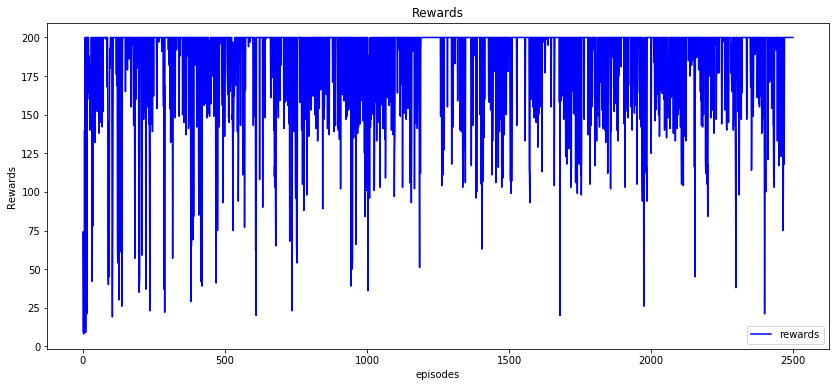

In [14]:
import gym
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
env = gym.make('CartPole-v0')
class Qlearning():
    def __init__(self,bins=(1, 1, 6, 12), max_episodes = 5000, max_steps = 200,min_alpha=0.1, min_epsilon=0.1, epsilon = 1.0, gamma = 1.0, decay = 25, solved=False, action_space = env.action_space.n):   #max_env_steps=None
        self.bins = bins #(1, 1, 6, 12)--> number of buckets for each action space
        self.max_episodes = max_episodes # number of training episodes 
        self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate
        self.beta = 0.5
        self.epsilon = epsilon # exploration rate
        self.min_alpha = min_alpha
        self.min_epsilon = min_epsilon 
        self.solved = solved
        self.gamma = gamma
        self.decay = decay  #works for most numbers between 5 and 35
        self.action_space = action_space
        self.env = gym.make('CartPole-v0')
        self.QTable = np.zeros((self.bins + (self.action_space,))) #The Q-matrix has now a dimension of (1 x 1 x 6 x 12 x 2).
        #print(self.QTable)
        
    def discretize(self, state):
        upper_bounds = [env.observation_space.high[0], 0.5, env.observation_space.high[2], math.radians(50)]  #UNDERSTAND HOW THIS WORKS
        lower_bounds = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -math.radians(50)]
        descretizedList = list()
        for i in  range(len(state)): #state = tuple (0,0,X,X)--> aka the state space  #scaling factor
            ratios = (state[i] + abs(upper_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) # (state+lower / bin_width) = bucket size
            new_obs = int(round((self.bins[i] - 1) * ratios)) #multiply the bucket size by the bucket # scaling the buckets so that the state is reduced#  - 1makes the first two buckets 0, and #bucket_lower := min_x + bucket × bucket size
            new_obs = min(self.bins[i] - 1, max(0, new_obs)) 
            descretizedList.append(new_obs)
        return tuple(descretizedList)

    def action_uniform(self, state):#_uniform
        action = self.env.action_space.sample()  #Only exploration
        return action
    
    def action_policy(self, state, policy):
        return policy[state]
    
    #def action_policy(self, state):
        

    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        # self.QTable[old_state][action] += alpha * (reward + self.gamma * np.max(self.Q[state_new]) - self.Q[state_old][action])
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
    
    def decay_step_size(self, t):
        num = self.alpha
        dem = t**self.beta
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = num / dem  
        return step_size
    

    def learning(self):
        listof100 = deque(maxlen=100) #https://stackoverflow.com/questions/5944708/python-forcing-a-list-to-a-fixed-size
        rewards = []
        alphaList = []
        tt = 0
        for e in range(self.max_episodes):  
            state = self.discretize(self.env.reset())
            step_size = 1 #self.decay_step_size(e)
            i = 0
            for t in range(self.max_steps):
                step_size = self.decay_step_size(t)
                tt+=1
                if e % 2 == 0:
                    action = self.action_uniform(state) #, epsilon)
                elif e % 2 == 1:
                    action = self.action_policy(state, policy)
                new_state, reward, done, info = self.env.step(action)
                new_state = self.discretize(new_state)
                self.Q_Update(state, action, reward, new_state, step_size)
                state = new_state
                i += 1
                if done:
                    break
            stateTuple = list()
            stateList = []
            actionsList = []
            states = []
            for list1 in self.QTable:
                for nextList in list1:
                    for nextList1 in nextList:
                        for nextList2 in nextList1:
                            actions = np.argmax(nextList2)
                            actionsList.append(actions)
            observations = np.argwhere(self.QTable>=0)
            j = 0
            for obsList in observations:
                stateTuple = (obsList[0], obsList[1], obsList[2], obsList[3])
                stateList.append(stateTuple)
            del stateList[1::2]
            policy = dict(zip(stateList, actionsList))
            listof100.append(i)
            mean_listof100 = np.mean(listof100)
            if e % 2 == 1:
                rewards.append(i)
            alphaList.append(step_size)
            mean_rewards =  np.mean(rewards)
            if mean_listof100 >= 195 and e >= 100:
                print("Solved after " + str(e) + " episodes.")
                return rewards, alphaList
        return rewards, alphaList
    

if __name__ == '__main__':
    ''' Run main program. '''
    #main()
    solve = Qlearning()
    rewards, alpha= solve.learning()
    fig = plt.figure(figsize=(14,6))
    """ax2 = fig.add_subplot(211)
    ax2.plot(alpha,  # epsilon_hist,
             color='b',
             label='Alpha')
    ax2.set(title='Step Size Plot',
            ylabel='Alpha',
            xlabel='episodes')"""
    ax3 = fig.add_subplot(111)
    ax3.plot(rewards,  # epsilon_hist,
             color='b',
             label='rewards')
    ax3.set(title='Rewards',
            ylabel='Rewards',
            xlabel='episodes')
    fig.subplots_adjust(hspace=0.5)
    #ax1.legend(loc='best')
    #ax2.legend(loc='best')
    ax3.legend(loc='best')

    plt.show()

# Continually Diminishing

/Users/lasyaakshara/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/lasyaakshara/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


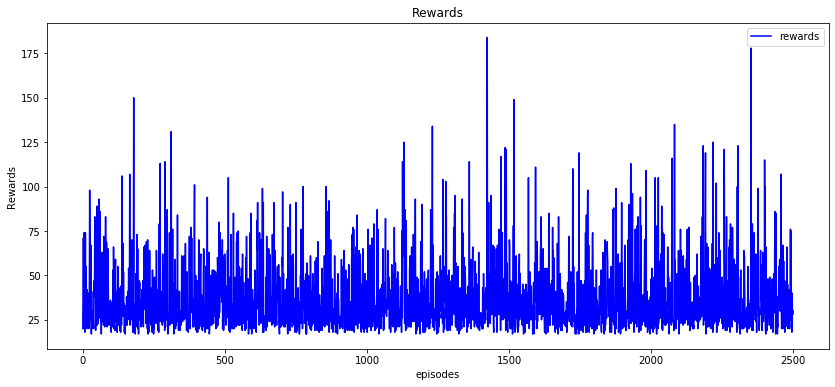

In [1]:
import gym
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
env = gym.make('CartPole-v0')
class Qlearning():
    def __init__(self,bins=(1, 1, 6, 12), max_episodes = 5000, max_steps = 200,min_alpha=0.1, min_epsilon=0.1, epsilon = 1.0, gamma = 1.0, decay = 25, solved=False, action_space = env.action_space.n):   #max_env_steps=None
        self.bins = bins #(1, 1, 6, 12)--> number of buckets for each action space
        self.max_episodes = max_episodes # number of training episodes 
        self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate
        self.beta = 0.5
        self.epsilon = epsilon # exploration rate
        self.min_alpha = min_alpha
        self.min_epsilon = min_epsilon 
        self.solved = solved
        self.gamma = gamma
        self.decay = decay  #works for most numbers between 5 and 35
        self.action_space = action_space
        self.env = gym.make('CartPole-v0')
        self.QTable = np.zeros((self.bins + (self.action_space,))) #The Q-matrix has now a dimension of (1 x 1 x 6 x 12 x 2).
        
    def discretize(self, state):
        upper_bounds = [env.observation_space.high[0], 0.5, env.observation_space.high[2], math.radians(50)]  #UNDERSTAND HOW THIS WORKS
        lower_bounds = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -math.radians(50)]
        descretizedList = list()
        for i in  range(len(state)): #state = tuple (0,0,X,X)--> aka the state space  #scaling factor
            ratios = (state[i] + abs(upper_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) # (state+lower / bin_width) = bucket size
            new_obs = int(round((self.bins[i] - 1) * ratios)) #multiply the bucket size by the bucket # scaling the buckets so that the state is reduced#  - 1makes the first two buckets 0, and #bucket_lower := min_x + bucket × bucket size
            new_obs = min(self.bins[i] - 1, max(0, new_obs)) 
            descretizedList.append(new_obs)
        return tuple(descretizedList)

    def action_uniform(self, state):#_uniform
        action = self.env.action_space.sample()  #Only exploration
        return action
    
    def action_policy(self, state, policy):
        return policy[state]
    
    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        # self.QTable[old_state][action] += alpha * (reward + self.gamma * np.max(self.Q[state_new]) - self.Q[state_old][action])
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
    
    def decay_step_size(self, tt, e, t):
        num = self.alpha
        dem = tt**self.beta
        if e == 0 and t == 0:
            step_size = 1
        elif tt > 0:
            step_size = num / dem
        return step_size 
    

    def learning(self):
        listof100 = deque(maxlen=100) #https://stackoverflow.com/questions/5944708/python-forcing-a-list-to-a-fixed-size
        rewards = []
        alphaList = []
        tt = 0
        for e in range(self.max_episodes):  
            state = self.discretize(self.env.reset())
            i = 0
            for t in range(self.max_steps):
                step_size = self.decay_step_size(tt, e, t)
                tt+=1
                if e % 2 == 0:
                    action = self.action_uniform(state) 
                elif e % 2 == 1:
                    action = self.action_policy(state, policy)
                new_state, reward, done, info = self.env.step(action)
                new_state = self.discretize(new_state)
                self.Q_Update(state, action, reward, new_state, step_size)
                state = new_state
                i += 1
                if done:
                    break
            stateTuple = list()
            stateList = []
            actionsList = []
            states = []
            for list1 in self.QTable:
                for nextList in list1:
                    for nextList1 in nextList:
                        for nextList2 in nextList1:
                            actions = np.argmax(nextList2)
                            actionsList.append(actions)
            observations = np.argwhere(self.QTable>=0)
            j = 0
            for obsList in observations:
                stateTuple = (obsList[0], obsList[1], obsList[2], obsList[3])
                stateList.append(stateTuple)
            del stateList[1::2]
            policy = dict(zip(stateList, actionsList))
            #print(e, np.argmax(self.QTable))
            listof100.append(i)
            mean_listof100 = np.mean(listof100)
            if e % 2 == 1:
                rewards.append(i)
            alphaList.append(step_size)
            mean_rewards =  np.mean(rewards)
            if mean_listof100 >= 195 and e >= 100:
                print("Solved after " + str(e) + " episodes.")
                return rewards, alphaList
        return rewards, alphaList
    

if __name__ == '__main__':
    ''' Run main program. '''
    #main()
    solve = Qlearning()
    rewards, alpha= solve.learning()
    fig = plt.figure(figsize=(14,6))
    """ax2 = fig.add_subplot(211)
    ax2.plot(alpha,  # epsilon_hist,
             color='b',
             label='Alpha')
    ax2.set(title='Step Size Plot',
            ylabel='Alpha',
            xlabel='episodes')"""
    ax3 = fig.add_subplot(111)
    ax3.plot(rewards,  # epsilon_hist,
             color='b',
             label='rewards')
    ax3.set(title='Rewards',
            ylabel='Rewards',
            xlabel='episodes')
    fig.subplots_adjust(hspace=0.5)
    #ax1.legend(loc='best')
    #ax2.legend(loc='best')
    ax3.legend(loc='best')

    plt.show()